# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Get test and train data

In [4]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = True
enable_feature_engineering_alco_smoking = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.0, 0.2)

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 2588 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 13 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 183 rows -> systolic bp too low.
Dropped 46 rows -> systolic bp too high.
Dropped 38 rows -> diastolic bp too low.
Dropped 904 rows -> diastolic bp too high.
Dropped 98 rows -> sytolic bp was lower than diastolic.


D:\Programms\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


# Model without tuning

## Create and train the model

In [6]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation

## Prediction

In [7]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)
y_proba = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.7326223432418123

Precision Score:
0.7479888359875225

Recall Score:
0.6949359365466748

F1-Score:
0.7204870720328931

Cost:
5535



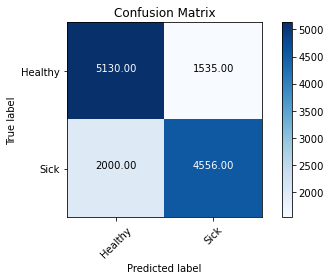

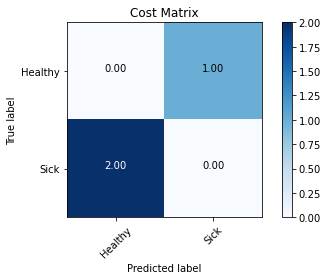

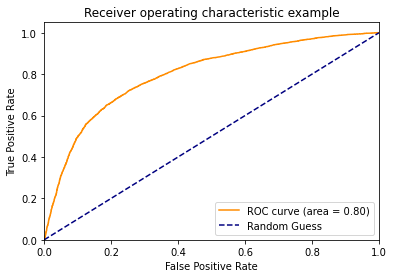


ROC Score:
0.7993365028261337


In [8]:
show_evaluation(y_test, y_pred, y_proba)

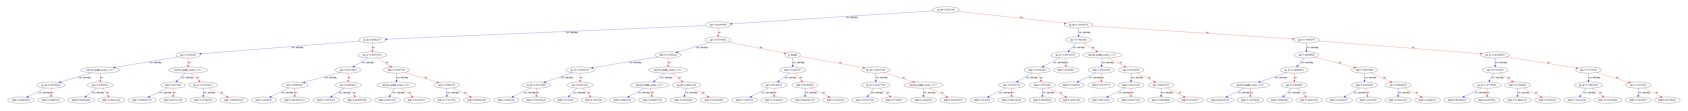

In [9]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

## Most important variables

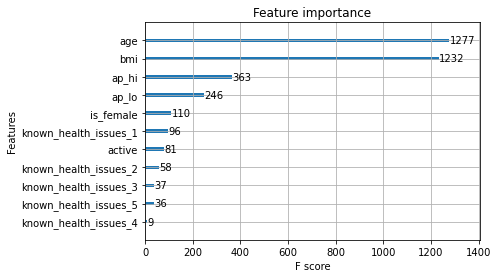

In [10]:
xgb.plot_importance(model)


# Model(s) with tuning

### Tune max_depth and min_child_weight

In [11]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 3.92470427,  3.40589132,  3.36081171,  5.07343154,  5.12110438,
          5.21265974,  7.19276381,  6.7551343 ,  7.07607651,  8.96562243,
         13.63772826, 42.4668313 ]),
  'std_fit_time': array([0.19057026, 0.0207769 , 0.03715346, 0.13611593, 0.26803094,
         0.22601146, 0.203723  , 0.0675821 , 0.2115597 , 0.07868263,
         6.88963353, 5.03299094]),
  'mean_score_time': array([0.05844359, 0.04408245, 0.03590431, 0.05325718, 0.05624938,
         0.05186124, 0.06103606, 0.07061143, 0.0861691 , 0.08856344,
         0.15418835, 0.30099554]),
  'std_score_time': array([0.01600254, 0.01120274, 0.00367822, 0.01064118, 0.00712478,
         0.01366093, 0.00872632, 0.01708211, 0.01488123, 0.01187451,
         0.11858765, 0.15905861]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [12]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([15.05633502, 14.4681067 , 13.61798177, 18.946732  , 20.06314631,
         19.28682256, 24.44183545, 25.28518176, 19.70649862]),
  'std_fit_time': array([0.20843148, 0.86500805, 0.1012979 , 0.11064095, 0.16751952,
         0.44121238, 0.1802088 , 0.403242  , 7.49394786]),
  'mean_score_time': array([0.1188817 , 0.11569114, 0.08317728, 0.13862801, 0.12127471,
         0.13483858, 0.14082341, 0.16037021, 0.08936105]),
  'std_score_time': array([0.01440239, 0.02474572, 0.01948791, 0.02671056, 0.01439236,
         0.02351818, 0.01912582, 0.04245222, 0.05934504]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],


In [13]:
param_test2b = {
 'max_depth':[2,3,4],
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2b.fit(x_train,y_train)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

({'mean_fit_time': array([2.13369327, 2.03715115, 2.07205772, 2.06447787, 2.56374311,
         2.60682774, 2.61161537, 2.5581583 , 3.11826   , 3.12125239,
         3.13780847, 3.0979146 ]),
  'std_fit_time': array([0.04651283, 0.04564083, 0.02259017, 0.02560627, 0.0153166 ,
         0.05609684, 0.04764141, 0.02178695, 0.02390786, 0.0203471 ,
         0.01871519, 0.04356205]),
  'mean_score_time': array([0.03670206, 0.03729992, 0.03191462, 0.0291223 , 0.03351045,
         0.02992001, 0.0321137 , 0.02972035, 0.03151565, 0.02912159,
         0.03370962, 0.03091712]),
  'std_score_time': array([0.00668686, 0.00214881, 0.0048449 , 0.00477896, 0.00555593,
         0.00209181, 0.00230897, 0.00270567, 0.00293109, 0.0021297 ,
         0.00298481, 0.00598421]),
  'param_max_depth': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

### Tune gamma

In [14]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([3.09013548, 3.11566739, 3.14279399, 3.13062768, 2.74545722]),
  'std_fit_time': array([0.03159855, 0.04594247, 0.03226316, 0.04366922, 0.81346352]),
  'mean_score_time': array([0.04507909, 0.03989348, 0.03769908, 0.03630271, 0.02972016]),
  'std_score_time': array([0.00957445, 0.00567659, 0.00385766, 0.00286238, 0.00494242]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.79496978, 0.79495406, 0.79498884, 0.79498914, 0.79509974]),
  'split1_test_score': array([0.79137514, 0.79137936, 0.79137175, 0.79141763, 0.79152299]),
  'split2_test_score': array([0.798975  , 0.79908693, 0.79884616, 0.79884051, 0.79900933]),
  'split3_test_score': array([0.79240793, 0.79239157, 0.79230554, 0.7923071 , 0.79224628]),

### Recheck model

In [15]:
model1 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model1.fit(x_train,y_train)


y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)
y_proba1 = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.7358747447243023

Precision Score:
0.7544850498338871

Recall Score:
0.6928004881025015

F1-Score:
0.7223282442748091

Cost:
5506



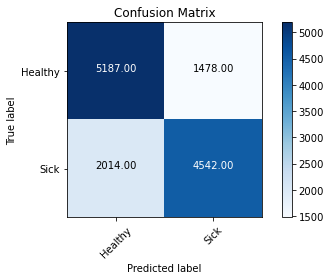

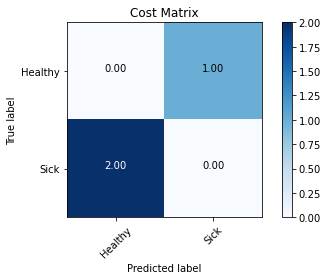

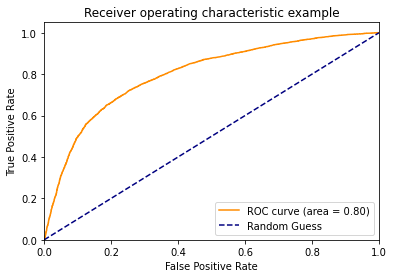


ROC Score:
0.7993365028261337


In [16]:
show_evaluation(y_test, y_pred1, y_proba1)

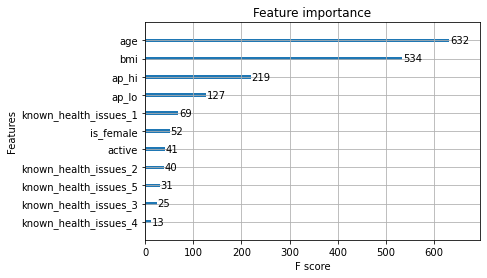

In [17]:
xgb.plot_importance(model1)

### Tune subsample and colsample_bytree

In [18]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}  
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([3.10389838, 2.99838152, 2.8146719 , 2.69160142, 3.26686277,
         3.11526833, 2.94392629, 2.81487184, 3.5066216 , 3.31313915,
         3.13122611, 2.95569544, 3.65662012, 3.5189889 , 3.26407013,
         3.07956309]),
  'std_fit_time': array([0.03372978, 0.05769607, 0.08562332, 0.03340319, 0.04000082,
         0.04658129, 0.05839134, 0.06977827, 0.0472482 , 0.08268109,
         0.06291544, 0.04789982, 0.02835379, 0.12717586, 0.0688911 ,
         0.05350927]),
  'mean_score_time': array([0.04807134, 0.04687467, 0.04647546, 0.04089036, 0.0418879 ,
         0.04168906, 0.04627576, 0.04328432, 0.04328418, 0.0343082 ,
         0.04208713, 0.03949442, 0.03909554, 0.03710036, 0.04228683,
         0.0273273 ]),
  'std_score_time': array([0.00544094, 0.01218249, 0.00486979, 0.00581536, 0.00512461,
         0.00477806, 0.00951557, 0.00184945, 0.00325319, 0.00593739,
         0.00677541, 0.00559175, 0.00547683, 0.00579447, 0.01037592,
         0.00337314]),
  'param_c

In [19]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([2.77358141, 2.67105641, 2.64153485, 3.192063  , 2.78933945,
         2.8515738 , 3.038873  , 2.94033604, 2.54838448]),
  'std_fit_time': array([0.05732803, 0.01828617, 0.00681074, 0.13192651, 0.03467198,
         0.13779417, 0.06707244, 0.0347117 , 0.61169544]),
  'mean_score_time': array([0.04069166, 0.03749928, 0.04168916, 0.03949389, 0.03690119,
         0.04049172, 0.03011904, 0.03171511, 0.02872267]),
  'std_score_time': array([0.00097739, 0.00401891, 0.00932168, 0.00861662, 0.00688122,
         0.0066937 , 0.00203454, 0.0029852 , 0.0035345 ]),
  'param_colsample_bytree': masked_array(data=[0.65, 0.65, 0.65, 0.7, 0.7, 0.7, 0.75, 0.75, 0.75],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95, 0.85, 0.9, 0.95, 0.85, 0.9, 0.95],
               mask=[False, False, False, False, False, False, Fals

### Tune regularization parameters

In [20]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=70, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([1.51295338, 1.51734166, 1.52113137, 1.52950912, 1.38589272]),
  'std_fit_time': array([0.01370404, 0.021865  , 0.01650126, 0.01344883, 0.32958097]),
  'mean_score_time': array([0.03151584, 0.03031931, 0.02972064, 0.03151565, 0.02832408]),
  'std_score_time': array([0.00720835, 0.00381608, 0.00369909, 0.00365657, 0.00391912]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.79574648, 0.79614713, 0.79590952, 0.79601166, 0.79414844]),
  'split1_test_score': array([0.79197189, 0.79184093, 0.79217105, 0.79187305, 0.79025391]),
  'split2_test_score': array([0.79893528, 0.79893559, 0.79889544, 0.79903969, 0.7971994 ]),
  'split3_test_score': array([0.79171411, 0.79153068, 0.7915094 ,

In [21]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([2.92916603, 2.84479165, 2.86872706, 2.89186578, 2.54658895]),
  'std_fit_time': array([0.06128526, 0.03382435, 0.01493425, 0.02107822, 0.71989558]),
  'mean_score_time': array([0.04468083, 0.04747281, 0.03670235, 0.03969398, 0.02792525]),
  'std_score_time': array([0.01205757, 0.00761174, 0.00460961, 0.00662701, 0.00178422]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.005},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05}],
  'split0_test_score': array([0.79509217, 0.795092  , 0.79524976, 0.79525067, 0.79513436]),
  'split1_test_score': array([0.79185788, 0.79185817, 0.7915689 , 0.79198081, 0.79212923]),
  'split2_test_score': array([0.79889391, 0.79889364, 0.79883572, 0.79887284, 0.7993193 ]),
  'split3_test_score': array([0.79191784, 0.79191809, 0.791

### Recheck model

In [22]:
model2 = XGBClassifier( 
    learning_rate=0.1, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=6, 
    gamma=0.0, 
    subsample=0.95, 
    colsample_bytree=0.75,
    reg_alpha=0.05,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model2.fit(x_train,y_train)


y_prob2 = model2.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)
y_proba2 = model2.predict_proba(x_test)[:,1]

Accuracy Score:
0.737387489599879

Precision Score:
0.7562313060817547

Recall Score:
0.6941732763880415

F1-Score:
0.7238746620009543

Cost:
5477



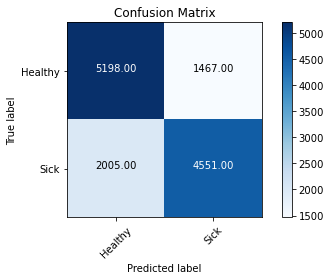

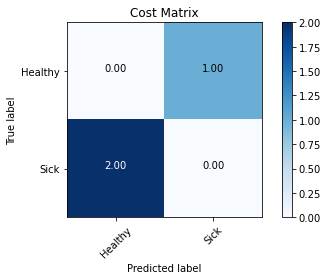

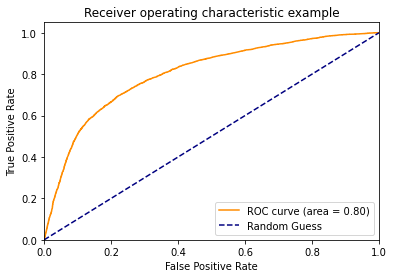


ROC Score:
0.8029500930754349


In [23]:
show_evaluation(y_test, y_pred2, y_proba2)

### Change learning rate

In [24]:
model3 = XGBClassifier( 
    learning_rate=0.01, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=6, 
    gamma=0.0, 
    subsample=0.95, 
    colsample_bytree=0.75,
    reg_alpha=0.05,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model3.fit(x_train,y_train)


y_prob3 = model3.predict(x_test.astype('float32'))
y_pred3 = np.round(y_prob3)
y_proba3 = model3.predict_proba(x_test)[:,1]

Accuracy Score:
0.7355721957491869

Precision Score:
0.7620760534429599

Recall Score:
0.6786150091519219

F1-Score:
0.7179280296917863

Cost:
5603



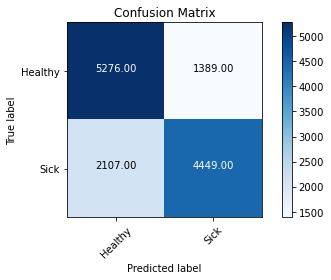

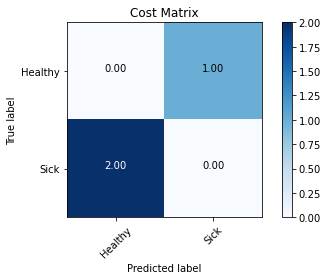

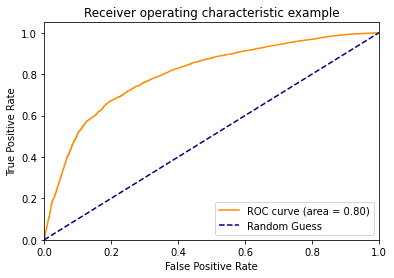


ROC Score:
0.8017369771057774


In [25]:
show_evaluation(y_test, y_pred3, y_proba3)

### Save predictions

In [26]:
# Save predictions
method_name = 'XGBoost'
predicted_probabilities = y_proba3
savePredictedProbabilities(method_name, y_test, predicted_probabilities)